In [22]:
import pandas as p
credit=p.read_csv("credictcard_data_german.csv",sep=" ")
print(credit.dtypes)
#credit.describe()

checking account      object
duration [month]       int64
credit history        object
purpose               object
amount                 int64
savings               object
employment            object
installment            int64
status                object
debtors               object
resident since         int64
property              object
age [years]            int64
plans                 object
housing               object
existing credits       int64
job                   object
maintaining people     int64
phone registered      object
foreign worker        object
classification        object
dtype: object


### A Korrelation zwischen intervallskalierten Variablen
Erstellen Sie ein Balkendiagramm, welches die 10 stärksten Korrelationen zwischen intervallskalierten Variablen sortiert visuell darstellt (von hoher Korrelation zu niedriger Korrelation). 

In [88]:
credit.corr()#zeigt die Korrelation aller intervallskalierten Variablen in einer Korrelationsmatrix

,duration [month],amount,installment,resident since,age [years],existing credits,maintaining people
duration [month],1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
resident since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age [years],-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
maintaining people,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [11]:
#Algorithmus um konkrete Korrelation zu berechnen (nicht die komplette Korrelationsmatrix)
coors=[];
names=[]
correlations=[]
for var in credit.dtypes.items():
    if var[1].name=="int64":
        
        for othervar in credit.dtypes.items():
            if (var[0]==othervar[0]):
                break
            if ((othervar[1].name=="int64") ):        
                
                correlation=credit[var[0]].corr(credit[othervar[0]])
                #print(var[0],othervar[0],"correl:",correlation)
                names.append(var[0]+"-"+othervar[0])
                coors.append(correlation)
                correlations.append([abs(correlation),correlation,var[0]+"-"+othervar[0]])
                #add name and coors
                



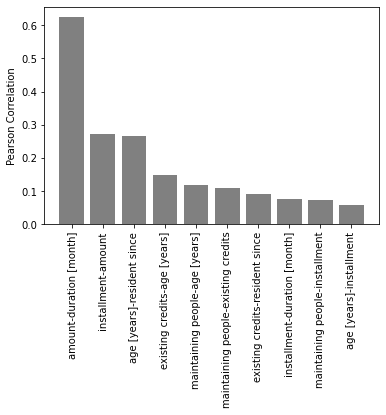

In [13]:
import matplotlib.pyplot as pp
import numpy as n
correlations.sort(reverse=True)
heights=[]
labels=[]
for i in range(10):
    correlation=correlations[i]
    heights.append(correlation[0])
    labels.append(correlation[2])
    
figure,axis=pp.subplots()
pp.xticks(rotation=90)
axis.bar(x=n.arange(len(heights)),height=heights,tick_label=labels,color="gray")
axis.set_ylabel("Pearson Correlation");


#### Streudiagramm zwischen amount & duration [month]

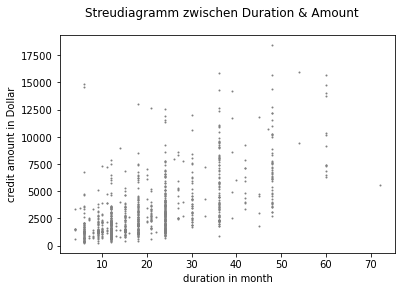

In [11]:
import matplotlib.pyplot as pp
figure,axis=pp.subplots()
axis.plot(credit["duration [month]"],credit.amount,".",color="gray",markersize=2)
axis.set_xlabel("duration in month");
axis.set_ylabel("credit amount in Dollar");
figure.suptitle("Streudiagramm zwischen Duration & Amount");
    

### B Bewertung von Gruppen
Messen Sie die stat. Abhängig von duration mit der Zielvariablen classification. Stellen Sie die Mittelwerte und Std-Abweichungen von duration getrennt nach den Ausprägungen der Zielvariablen visuell dar.

In [21]:
from scipy.stats  import ttest_ind
subset_good=credit[credit.classification=="good"]
subset_bad=credit[credit.classification=="bad"]
for testvar in credit.keys():
    if credit.dtypes[testvar]=="int64": #int64 == interval scaled variable
        tval,pval=ttest_ind(subset_good[testvar],subset_bad[testvar])
        meanGood=subset_good[testvar].mean();
        stdGood=subset_good[testvar].mean();
        meanBad=subset_bad[testvar].mean();
        stdBad=subset_bad[testvar].mean();
        print("var",testvar,"tval=",'{:.1f}'.format(abs(tval)),"pval=",'{:.1f}'.format(pval),"mean+="+'{:.1f}'.format(meanGood),"mean-="+'{:.1f}'.format(meanBad))


var duration [month] tval= 7.0 pval= 0.0 mean+=19.2 mean-=24.9
var amount tval= 4.9 pval= 0.0 mean+=2985.5 mean-=3938.1
var installment tval= 2.3 pval= 0.0 mean+=2.9 mean-=3.1
var resident since tval= 0.1 pval= 0.9 mean+=2.8 mean-=2.9
var age [years] tval= 2.9 pval= 0.0 mean+=36.2 mean-=34.0
var existing credits tval= 1.4 pval= 0.1 mean+=1.4 mean-=1.4
var maintaining people tval= 0.1 pval= 0.9 mean+=1.2 mean-=1.2


[19.207142857142856, 24.86] [[0, 0], [11.079564266189928, 13.282638856163995]]


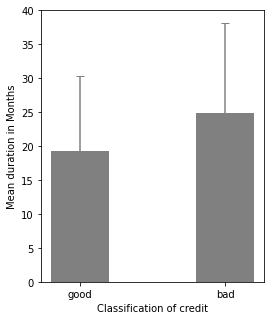

In [93]:
figure,axis=pp.subplots(figsize=(4,5))
heights=[subset_good["duration [month]"].mean(),subset_bad["duration [month]"].mean()]
stds=[[0,0],[subset_good["duration [month]"].std(),subset_bad["duration [month]"].std()]]
print(heights,stds)
axis.bar(x=n.arange(len(heights)),height=heights,tick_label=["good","bad"],color="gray",yerr=stds,ecolor="gray",width=0.4,capsize=4)
axis.set_ylabel("Mean duration in Months");
axis.set_xlabel("Classification of credit");


good: $\mu=19.2 \pm \sigma=11.1$ Monate  bad: $\mu=24.8 \pm \sigma=13.3$ Monate

### C Bewertung kategorischer Variablen
Geben Sie die Kontingenztabelle von i) checking account vs classification und ii) job vs classification mitsamt X²-Wert und p-Wert an. Welche Aussage kann aus dem p-Wert und der Kontingenztabelle abgeleitet werden?

In [42]:
from scipy.stats import chi2_contingency
def chisquare(varname):
    contingencyTable=p.crosstab(credit[varname],credit.classification)
    chi2,pval,dof,expectedFreq=chi2_contingency(contingencyTable)
    print("testvar:",varname,"chi2=",'{:.1f}'.format(chi2),"pval=",'{:.5f}'.format(pval),"dof=",dof)#show pval in non-scienetific expression
    return contingencyTable

In [32]:
chisquare("job")



testvar: job chi2= 1.9 pval= 0.6 dof= 3


classification,bad,good
job,,
A171,7,15
A172,56,144
A173,186,444
A174,51,97


In [80]:
chisquare("checking account")



testvar: checking account chi2= 123.72094351626559 pval= 0.000000 dof= 3


classification,bad,good
checking account,,
A11,135,139
A12,105,164
A13,14,49
A14,46,348


In [44]:
chisquare("credit history")

testvar: credit history chi2= 61.7 pval= 0.00000 dof= 4


classification,bad,good
credit history,,
A30,25,15
A31,28,21
A32,169,361
A33,28,60
A34,50,243


In [45]:
chisquare("savings")

testvar: savings chi2= 36.1 pval= 0.00000 dof= 4


classification,bad,good
savings,,
A61,217,386
A62,34,69
A63,11,52
A64,6,42
A65,32,151


#### Check über alle kategorischen Variab´len

In [43]:
for var in credit.dtypes.items():
    if var[1].name=="object" and var[0]!="classification":
        chisquare(var[0])

testvar: checking account chi2= 123.7 pval= 0.00000 dof= 3
testvar: credit history chi2= 61.7 pval= 0.00000 dof= 4
testvar: purpose chi2= 33.4 pval= 0.00012 dof= 9
testvar: savings chi2= 36.1 pval= 0.00000 dof= 4
testvar: employment chi2= 18.4 pval= 0.00105 dof= 4
testvar: status chi2= 9.6 pval= 0.02224 dof= 3
testvar: debtors chi2= 6.6 pval= 0.03606 dof= 2
testvar: property chi2= 23.7 pval= 0.00003 dof= 3
testvar: plans chi2= 12.8 pval= 0.00163 dof= 2
testvar: housing chi2= 18.2 pval= 0.00011 dof= 2
testvar: job chi2= 1.9 pval= 0.59658 dof= 3
testvar: phone registered chi2= 1.2 pval= 0.27888 dof= 1
testvar: foreign worker chi2= 5.8 pval= 0.01583 dof= 1
